In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

# Define learning parameters

In [2]:
# learning parameters
#batch_size = 256
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

235it [00:12, 19.01it/s]                                                                                                                                                                                                           


Epoch 1 of 100
Generator loss: 1.99907458, Discriminator loss: 1.14223206


235it [00:11, 19.96it/s]                                                                                                                                                                                                           


Epoch 2 of 100
Generator loss: 2.99369240, Discriminator loss: 0.87609768


235it [00:11, 19.82it/s]                                                                                                                                                                                                           


Epoch 3 of 100
Generator loss: 1.54606664, Discriminator loss: 1.24683464


235it [00:12, 18.97it/s]                                                                                                                                                                                                           


Epoch 4 of 100
Generator loss: 1.88832355, Discriminator loss: 1.13925707


235it [00:11, 19.88it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


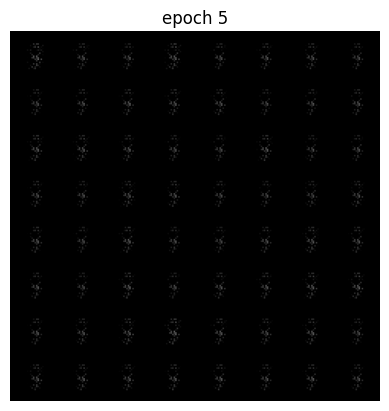

Epoch 5 of 100
Generator loss: 1.26107121, Discriminator loss: 1.18796217


235it [00:12, 19.37it/s]                                                                                                                                                                                                           


Epoch 6 of 100
Generator loss: 1.47661436, Discriminator loss: 1.29310107


235it [00:11, 19.59it/s]                                                                                                                                                                                                           


Epoch 7 of 100
Generator loss: 1.59410203, Discriminator loss: 1.21805477


235it [00:12, 18.91it/s]                                                                                                                                                                                                           


Epoch 8 of 100
Generator loss: 1.49861348, Discriminator loss: 1.00526083


235it [00:12, 18.80it/s]                                                                                                                                                                                                           


Epoch 9 of 100
Generator loss: 1.51954019, Discriminator loss: 1.01309204


235it [00:12, 18.87it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


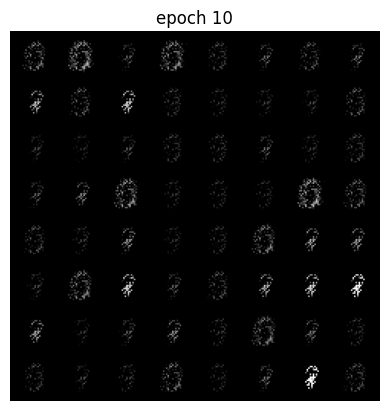

Epoch 10 of 100
Generator loss: 3.06686831, Discriminator loss: 0.68285066


235it [00:12, 19.02it/s]                                                                                                                                                                                                           


Epoch 11 of 100
Generator loss: 2.00055575, Discriminator loss: 0.76587969


235it [00:12, 19.14it/s]                                                                                                                                                                                                           


Epoch 12 of 100
Generator loss: 2.57807040, Discriminator loss: 0.45873693


235it [00:12, 19.18it/s]                                                                                                                                                                                                           


Epoch 13 of 100
Generator loss: 3.11070418, Discriminator loss: 0.57938242


235it [00:12, 19.14it/s]                                                                                                                                                                                                           


Epoch 14 of 100
Generator loss: 2.69492507, Discriminator loss: 0.50616759


235it [00:12, 18.93it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


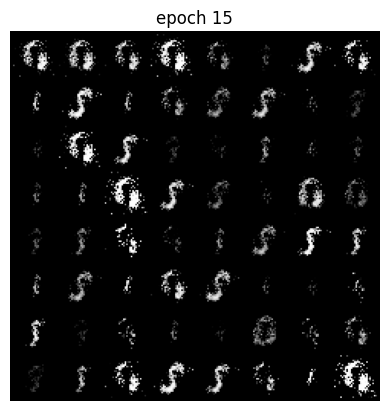

Epoch 15 of 100
Generator loss: 3.12567902, Discriminator loss: 0.44457582


235it [00:12, 19.04it/s]                                                                                                                                                                                                           


Epoch 16 of 100
Generator loss: 2.68835831, Discriminator loss: 0.57715511


235it [00:12, 18.79it/s]                                                                                                                                                                                                           


Epoch 17 of 100
Generator loss: 2.55631351, Discriminator loss: 0.54370654


235it [00:12, 18.77it/s]                                                                                                                                                                                                           


Epoch 18 of 100
Generator loss: 2.66427922, Discriminator loss: 0.54275930


235it [00:12, 18.72it/s]                                                                                                                                                                                                           


Epoch 19 of 100
Generator loss: 2.44916272, Discriminator loss: 0.60604322


235it [00:12, 18.57it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


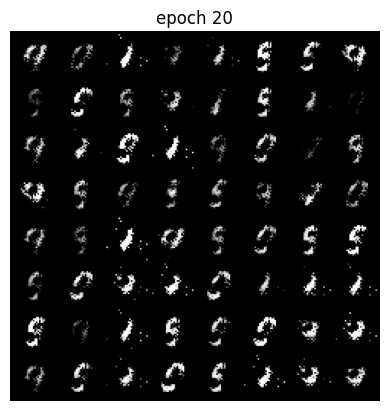

Epoch 20 of 100
Generator loss: 2.72054625, Discriminator loss: 0.60357165


235it [00:12, 18.65it/s]                                                                                                                                                                                                           


Epoch 21 of 100
Generator loss: 2.69526005, Discriminator loss: 0.55397868


235it [00:12, 18.31it/s]                                                                                                                                                                                                           


Epoch 22 of 100
Generator loss: 2.52459621, Discriminator loss: 0.56435353


235it [00:12, 18.32it/s]                                                                                                                                                                                                           


Epoch 23 of 100
Generator loss: 2.57308364, Discriminator loss: 0.58355957


235it [00:12, 18.12it/s]                                                                                                                                                                                                           


Epoch 24 of 100
Generator loss: 2.76366830, Discriminator loss: 0.54006910


235it [00:13, 18.01it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


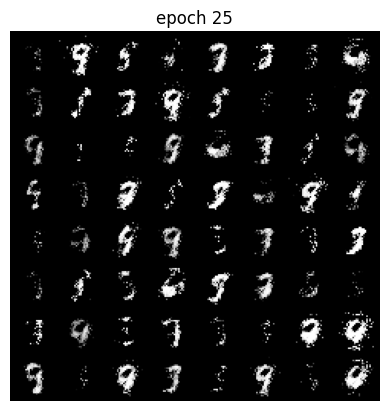

Epoch 25 of 100
Generator loss: 2.78014064, Discriminator loss: 0.59083205


235it [00:13, 17.98it/s]                                                                                                                                                                                                           


Epoch 26 of 100
Generator loss: 2.68961930, Discriminator loss: 0.52121764


235it [00:13, 17.88it/s]                                                                                                                                                                                                           


Epoch 27 of 100
Generator loss: 2.75026107, Discriminator loss: 0.55948472


235it [00:13, 17.77it/s]                                                                                                                                                                                                           


Epoch 28 of 100
Generator loss: 2.74387383, Discriminator loss: 0.58916759


235it [00:13, 17.71it/s]                                                                                                                                                                                                           


Epoch 29 of 100
Generator loss: 2.72781801, Discriminator loss: 0.54913896


235it [00:13, 17.63it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


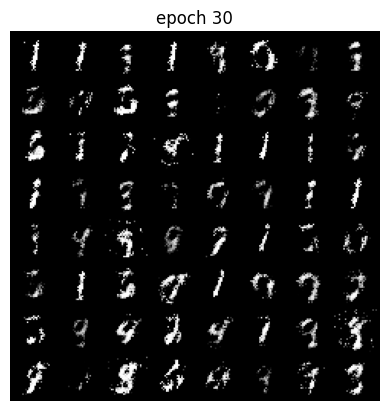

Epoch 30 of 100
Generator loss: 2.69791436, Discriminator loss: 0.54352206


235it [00:13, 17.58it/s]                                                                                                                                                                                                           


Epoch 31 of 100
Generator loss: 2.60487437, Discriminator loss: 0.58468741


235it [00:13, 17.50it/s]                                                                                                                                                                                                           


Epoch 32 of 100
Generator loss: 2.45016742, Discriminator loss: 0.65070319


235it [00:13, 17.48it/s]                                                                                                                                                                                                           


Epoch 33 of 100
Generator loss: 2.26146388, Discriminator loss: 0.70231640


235it [00:13, 17.36it/s]                                                                                                                                                                                                           


Epoch 34 of 100
Generator loss: 2.25027657, Discriminator loss: 0.68236631


235it [00:13, 17.30it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


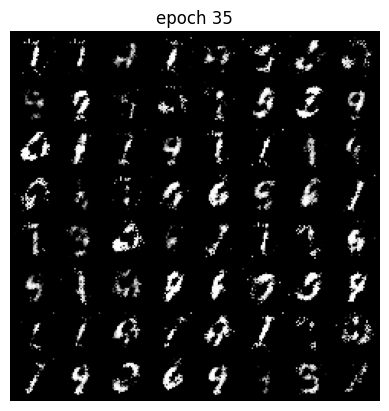

Epoch 35 of 100
Generator loss: 2.31456137, Discriminator loss: 0.67841458


235it [00:13, 17.29it/s]                                                                                                                                                                                                           


Epoch 36 of 100
Generator loss: 2.17428088, Discriminator loss: 0.71129817


235it [00:13, 17.17it/s]                                                                                                                                                                                                           


Epoch 37 of 100
Generator loss: 2.36915851, Discriminator loss: 0.66998160


235it [00:13, 17.11it/s]                                                                                                                                                                                                           


Epoch 38 of 100
Generator loss: 2.30299020, Discriminator loss: 0.66316491


235it [00:13, 17.16it/s]                                                                                                                                                                                                           


Epoch 39 of 100
Generator loss: 2.19046926, Discriminator loss: 0.70921195


235it [00:13, 17.22it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


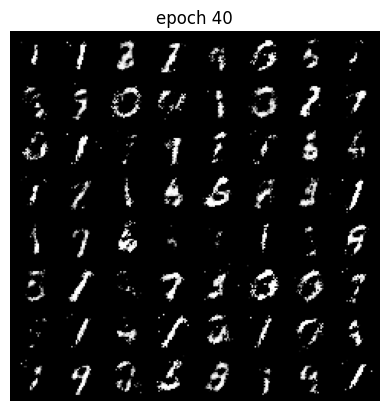

Epoch 40 of 100
Generator loss: 2.19596982, Discriminator loss: 0.72378176


235it [00:13, 16.86it/s]                                                                                                                                                                                                           


Epoch 41 of 100
Generator loss: 2.06435275, Discriminator loss: 0.72499132


235it [00:13, 16.84it/s]                                                                                                                                                                                                           


Epoch 42 of 100
Generator loss: 2.04331207, Discriminator loss: 0.76089674


235it [00:14, 16.73it/s]                                                                                                                                                                                                           


Epoch 43 of 100
Generator loss: 2.02818441, Discriminator loss: 0.75786877


235it [00:14, 16.72it/s]                                                                                                                                                                                                           


Epoch 44 of 100
Generator loss: 1.96194208, Discriminator loss: 0.78603464


235it [00:14, 16.67it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


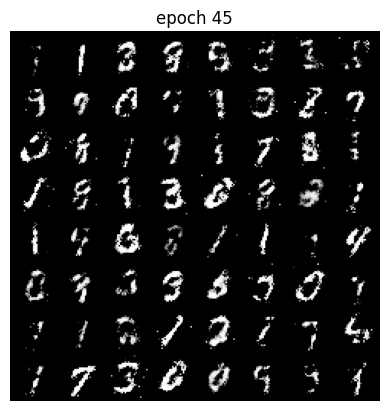

Epoch 45 of 100
Generator loss: 1.80994415, Discriminator loss: 0.84527934


235it [00:14, 16.63it/s]                                                                                                                                                                                                           


Epoch 46 of 100
Generator loss: 1.94901013, Discriminator loss: 0.80080873


235it [00:14, 16.57it/s]                                                                                                                                                                                                           


Epoch 47 of 100
Generator loss: 1.85021830, Discriminator loss: 0.85029936


235it [00:14, 16.48it/s]                                                                                                                                                                                                           


Epoch 48 of 100
Generator loss: 1.91471744, Discriminator loss: 0.78458160


235it [00:14, 16.40it/s]                                                                                                                                                                                                           


Epoch 49 of 100
Generator loss: 1.96906543, Discriminator loss: 0.79031777


235it [00:14, 16.42it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


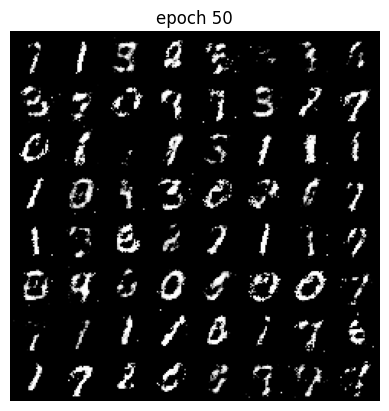

Epoch 50 of 100
Generator loss: 2.00235105, Discriminator loss: 0.76833564


235it [00:14, 16.39it/s]                                                                                                                                                                                                           


Epoch 51 of 100
Generator loss: 1.99404609, Discriminator loss: 0.80312228


235it [00:14, 16.40it/s]                                                                                                                                                                                                           


Epoch 52 of 100
Generator loss: 1.82292891, Discriminator loss: 0.82930648


235it [00:14, 16.35it/s]                                                                                                                                                                                                           


Epoch 53 of 100
Generator loss: 1.90626073, Discriminator loss: 0.81919330


235it [00:14, 16.23it/s]                                                                                                                                                                                                           


Epoch 54 of 100
Generator loss: 1.67742288, Discriminator loss: 0.89199275


235it [00:14, 16.20it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


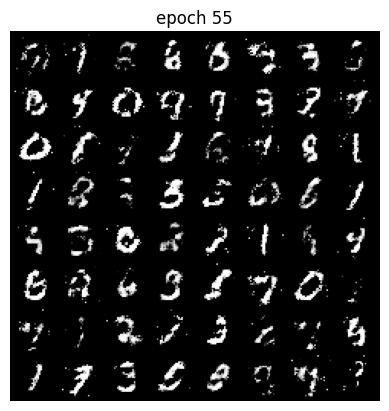

Epoch 55 of 100
Generator loss: 1.83666158, Discriminator loss: 0.85349423


235it [00:14, 16.07it/s]                                                                                                                                                                                                           


Epoch 56 of 100
Generator loss: 1.74902844, Discriminator loss: 0.86316335


235it [00:14, 15.93it/s]                                                                                                                                                                                                           


Epoch 57 of 100
Generator loss: 1.74111509, Discriminator loss: 0.86051184


235it [00:14, 15.93it/s]                                                                                                                                                                                                           


Epoch 58 of 100
Generator loss: 1.65893519, Discriminator loss: 0.90058547


235it [00:14, 15.75it/s]                                                                                                                                                                                                           


Epoch 59 of 100
Generator loss: 1.62883842, Discriminator loss: 0.93523943


235it [00:14, 15.79it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


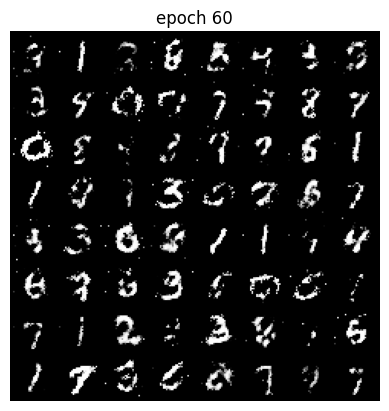

Epoch 60 of 100
Generator loss: 1.62995768, Discriminator loss: 0.93118948


235it [00:14, 15.70it/s]                                                                                                                                                                                                           


Epoch 61 of 100
Generator loss: 1.58448243, Discriminator loss: 0.93655360


235it [00:15, 15.60it/s]                                                                                                                                                                                                           


Epoch 62 of 100
Generator loss: 1.67114425, Discriminator loss: 0.89560139


235it [00:15, 15.51it/s]                                                                                                                                                                                                           


Epoch 63 of 100
Generator loss: 1.65167665, Discriminator loss: 0.92493504


235it [00:15, 15.42it/s]                                                                                                                                                                                                           


Epoch 64 of 100
Generator loss: 1.59750605, Discriminator loss: 0.94330877


235it [00:15, 15.30it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


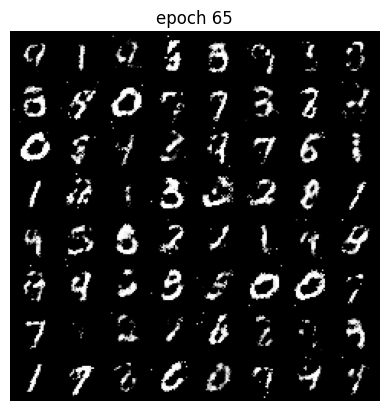

Epoch 65 of 100
Generator loss: 1.58932722, Discriminator loss: 0.94360965


235it [00:16, 14.62it/s]                                                                                                                                                                                                           


Epoch 66 of 100
Generator loss: 1.57853615, Discriminator loss: 0.93632668


235it [00:16, 14.46it/s]                                                                                                                                                                                                           


Epoch 67 of 100
Generator loss: 1.57873237, Discriminator loss: 0.94503403


235it [00:16, 14.34it/s]                                                                                                                                                                                                           


Epoch 68 of 100
Generator loss: 1.57965398, Discriminator loss: 0.94141656


235it [00:16, 14.31it/s]                                                                                                                                                                                                           


Epoch 69 of 100
Generator loss: 1.50690699, Discriminator loss: 0.96301997


235it [00:16, 14.37it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


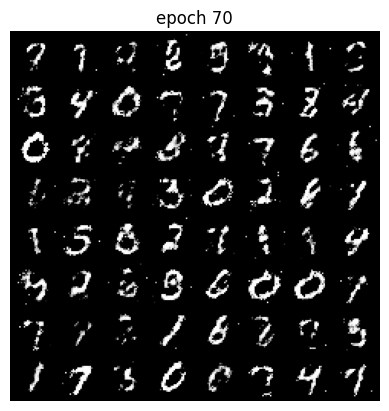

Epoch 70 of 100
Generator loss: 1.55133176, Discriminator loss: 0.95975655


235it [00:16, 14.38it/s]                                                                                                                                                                                                           


Epoch 71 of 100
Generator loss: 1.57078445, Discriminator loss: 0.94569319


235it [00:15, 14.75it/s]                                                                                                                                                                                                           


Epoch 72 of 100
Generator loss: 1.55622327, Discriminator loss: 0.95448411


235it [00:15, 14.69it/s]                                                                                                                                                                                                           


Epoch 73 of 100
Generator loss: 1.62061930, Discriminator loss: 0.92245120


235it [00:16, 14.12it/s]                                                                                                                                                                                                           


Epoch 74 of 100
Generator loss: 1.51229751, Discriminator loss: 0.97083205


235it [00:16, 13.96it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


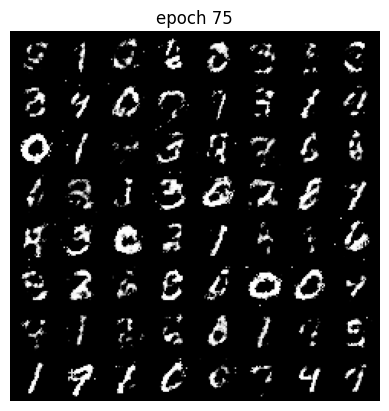

Epoch 75 of 100
Generator loss: 1.51817131, Discriminator loss: 0.96956438


235it [00:16, 14.43it/s]                                                                                                                                                                                                           


Epoch 76 of 100
Generator loss: 1.44322538, Discriminator loss: 0.99125272


235it [00:16, 13.89it/s]                                                                                                                                                                                                           


Epoch 77 of 100
Generator loss: 1.46317685, Discriminator loss: 0.97360069


235it [00:16, 13.97it/s]                                                                                                                                                                                                           


Epoch 78 of 100
Generator loss: 1.43953359, Discriminator loss: 0.99669945


235it [00:15, 14.99it/s]                                                                                                                                                                                                           


Epoch 79 of 100
Generator loss: 1.41882813, Discriminator loss: 1.01490879


235it [00:15, 15.39it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


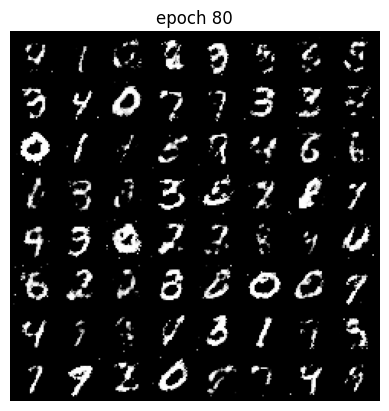

Epoch 80 of 100
Generator loss: 1.41200840, Discriminator loss: 1.01774514


235it [00:14, 15.75it/s]                                                                                                                                                                                                           


Epoch 81 of 100
Generator loss: 1.37241614, Discriminator loss: 1.05203557


235it [00:14, 16.18it/s]                                                                                                                                                                                                           


Epoch 82 of 100
Generator loss: 1.39691961, Discriminator loss: 1.02992415


235it [00:14, 16.75it/s]                                                                                                                                                                                                           


Epoch 83 of 100
Generator loss: 1.40558076, Discriminator loss: 1.02469563


235it [00:13, 16.85it/s]                                                                                                                                                                                                           


Epoch 84 of 100
Generator loss: 1.38186622, Discriminator loss: 1.02598011


235it [00:13, 16.80it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


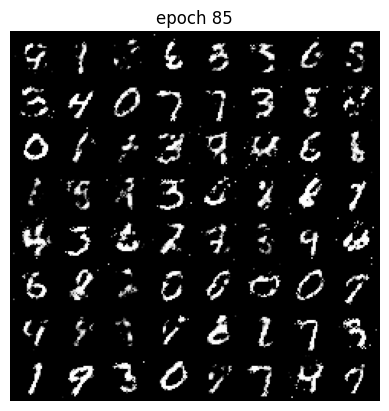

Epoch 85 of 100
Generator loss: 1.33357012, Discriminator loss: 1.05441260


235it [00:14, 16.52it/s]                                                                                                                                                                                                           


Epoch 86 of 100
Generator loss: 1.37254322, Discriminator loss: 1.03044486


235it [00:14, 16.36it/s]                                                                                                                                                                                                           


Epoch 87 of 100
Generator loss: 1.36476457, Discriminator loss: 1.04034972


235it [00:14, 16.31it/s]                                                                                                                                                                                                           


Epoch 88 of 100
Generator loss: 1.34139156, Discriminator loss: 1.04518938


235it [00:14, 16.10it/s]                                                                                                                                                                                                           


Epoch 89 of 100
Generator loss: 1.35847867, Discriminator loss: 1.04867303


235it [00:14, 16.26it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


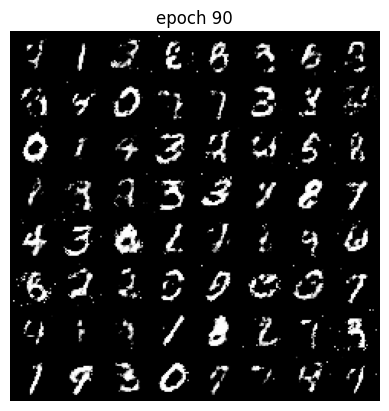

Epoch 90 of 100
Generator loss: 1.33435905, Discriminator loss: 1.05540097


235it [00:14, 16.07it/s]                                                                                                                                                                                                           


Epoch 91 of 100
Generator loss: 1.33227837, Discriminator loss: 1.04565954


235it [00:14, 16.03it/s]                                                                                                                                                                                                           


Epoch 92 of 100
Generator loss: 1.30591834, Discriminator loss: 1.06666207


235it [00:14, 15.99it/s]                                                                                                                                                                                                           


Epoch 93 of 100
Generator loss: 1.29919696, Discriminator loss: 1.06465244


235it [00:14, 15.95it/s]                                                                                                                                                                                                           


Epoch 94 of 100
Generator loss: 1.28168046, Discriminator loss: 1.07980800


235it [00:14, 15.81it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


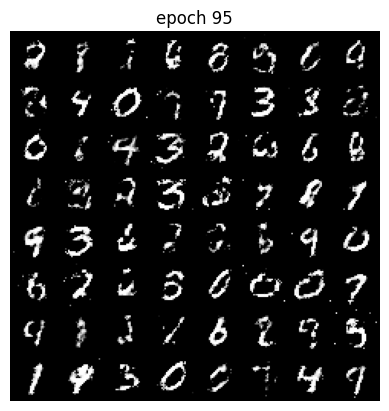

Epoch 95 of 100
Generator loss: 1.31550932, Discriminator loss: 1.07317483


235it [00:14, 15.74it/s]                                                                                                                                                                                                           


Epoch 96 of 100
Generator loss: 1.25382519, Discriminator loss: 1.08223927


235it [00:15, 15.67it/s]                                                                                                                                                                                                           


Epoch 97 of 100
Generator loss: 1.27614927, Discriminator loss: 1.08037364


235it [00:15, 15.60it/s]                                                                                                                                                                                                           


Epoch 98 of 100
Generator loss: 1.25538027, Discriminator loss: 1.09083867


235it [00:15, 15.54it/s]                                                                                                                                                                                                           


Epoch 99 of 100
Generator loss: 1.29245400, Discriminator loss: 1.07333994


235it [00:15, 15.48it/s]                                                                                                                                                                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


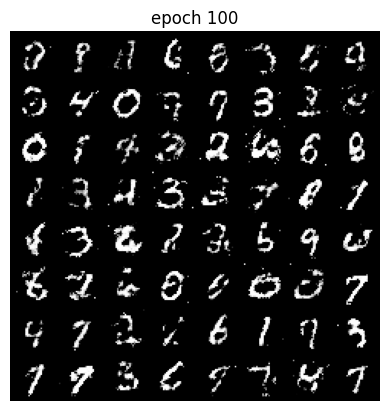

Epoch 100 of 100
Generator loss: 1.22562110, Discriminator loss: 1.10382640
runtime is 1414.5829422473907


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output,true_label).to(device)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output,true_label).to(device)
    
    ######################################
    
#start_time = time.time()
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real,_ = data
        real_labels = label_real(real.size()[0])
        real_labels.to(device)
        fake = generator(create_noise(real.size()[0],nz))
        fake.to(device)
        discriminator.zero_grad()
        loss_d_i = discriminator_loss(discriminator(real.to(device)),real_labels) + discriminator_loss(discriminator(fake.detach()), label_fake(real.size()[0]))
        loss_d_i.backward()
        optim_d.step()
        
        generator.zero_grad()
        loss_g_i = generator_loss(discriminator(fake), real_labels)
        loss_g_i.backward()
        optim_g.step()

        loss_g+=loss_g_i
        loss_d+=loss_d_i
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
#print("runtime is " + str(time.time() - start_time))

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

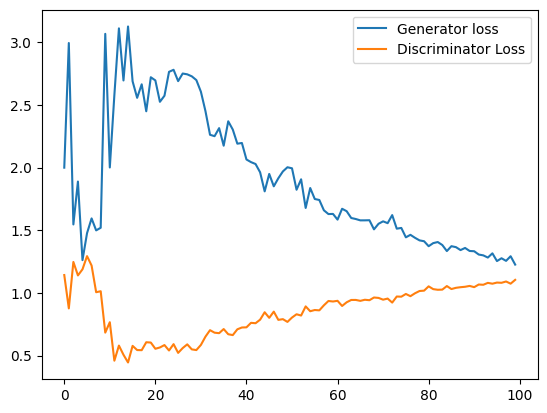

In [17]:
# plot and save the generator and discriminator loss
plt.figure()

plt.plot([l.item() for l in losses_g], label='Generator loss')
plt.plot([l.item() for l in losses_d], label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')